In [308]:
import matplotlib.pyplot as plt
import math
import random

def blX(a1,a2,g1,q1,g2,q2,f1,f2,nu2,cx,n):
    return a1*math.exp(-g1*n*n)*math.cos(2.0*math.pi*q1*n+f1)+a2*math.exp(-g2*n*n)*math.cos(2.0*math.pi*q2*n+f2+nu2)+cx

def blY(a3,a4,g1,q1,g2,q2,f1,f2,nu1,cy,n):
    return a3*math.exp(-g1*n*n)*math.cos(2.0*math.pi*q1*n+f1+nu1)+a4*math.exp(-g2*n*n)*math.cos(2.0*math.pi*q2*n+f2)+cy

def csineGQN(gamma,q,n):
    """ Damped-Gaussian Cosine Term with tune Q=mu/2pi """
    return math.exp(-n*n*gamma)*math.cos(2.0*math.pi*q*n)
    
def sineGQN(gamma,q,n):
    """ Damped-Gaussian Sine Term """
    return math.exp(-n*n*gamma)*math.sin(2.0*math.pi*q*n)
    
def unnormalizedCoupledVectorSubspace(g1,q1,g2,q2,nMax):
    c1x = []
    s1x = []
    c2x = []
    s2x = []
    zx = []

    for n in range(nMax):
        c1x.append(csineGQN(g1,q1,n))
        s1x.append(sineGQN(g1,q1,n))
        c2x.append(csineGQN(g2,q2,n))
        s2x.append(sineGQN(g2,q2,n))
        zx.append(1.0)
        
    return [c1x,s1x,c2x,s2x,zx]

def dot(v1,v2):
    dp = 0.0
    for i in range(len(v1)):
        dp += v1[i]*v2[i]
    return dp

def norm(v):
    """ Norm of vector v."""
    n = dot(v,v)
    return math.sqrt(n)

def project(v1,v2):
    """Project vector v1 onto v2."""
    nSq = dot(v2,v2)
    d = dot(v1,v2)
    p =[(d/nSq)*v2[i] for i in range(len(v2))]
    return p

def normalize(v):
    n = norm(v)
    return [i/n for i in v]
    
def gramSchmidt(v):
    """ Gram-Schmidt. """
    u = []
    u.append(v[0])

    for i in range(1,len(v)):
        thisV = v[i]
        for j in range(i):
            pr    = project(v[i],u[j])
            thisV = [thisV[i]-pr[i] for i in range(len(pr))]
        u.append(thisV)
    
    for i in range(len(v)):
        e = [normalize(uu) for uu in u]
        
    return e

def vectorAdd(v1,v2):
    return [v1[i]+v2[i] for i in range(len(v1))]

def vectorSubtract(v1,v2):
    return [v1[i]-v2[i] for i in range(len(v1))]
    
def errorVec(subspace,wf):
    secondTerm = [0.0 for i in range(len(wf))]
    
    for i in range(len(subspace)):
        ss = subspace[i]
        pr = project(wf,ss) # project wf onto basis vectors
        secondTerm = vectorAdd(secondTerm, pr)
        
    err = [(wf[i] - secondTerm[i]) for i in range(len(wf))]
    return err
print("Functions Defined")

Functions Defined


Error =  1.7547759850409772e-14


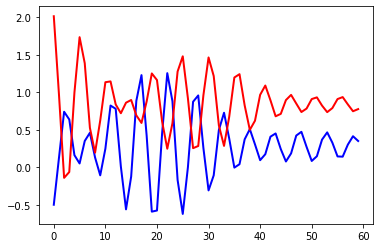

In [337]:
nMax = 60
    
x = []
y = []

#Global parameters
(g1, g2) = (0.001,0.00058)
(q1, q2) = (0.166,0.195)

#Local parameters
(a1, a2) = (1.0,1.3)
(a3, a4) = (1.2,1.75)
(f1, f2) = (0.0,math.pi*0.5)
(nu1,nu2) = (math.pi*0.7,math.pi*0.2)
(cx,cy) = (1.3,-2.4)

unnorm   = unnormalizedCoupledVectorSubspace(g1,q1,g2,q2,nMax)
subspace = gramSchmidt(unnorm)

def coupledWFPt(a1,a2,g1,q1,g2,q2,f1,f2,c,n):
    """ Works for either plane. """
    mode1 = a1*math.exp(-g1*n*n)*math.cos(2*math.pi*n*q1+f1) 
    mode2 = a2*math.exp(-g2*n*n)*math.cos(2*math.pi*n*q2+f2)
    return (mode1 + mode2 +c)

def randomCoupledWF(g1,q1,g2,q2,nMax):
    """ Works for either plane. """
    a1 = random.random()
    a2 = random.random()
    f1 = math.pi*2*random.random()
    f2 = math.pi*2*random.random()
    c  = random.random()
    wf = [coupledWFPt(a1,a2,g1,q1,g2,q2,f1,f2,c,n) for n in range(nMax)]
    return wf

x = randomCoupledWF(g1,q1,g2,q2,nMax)
y = randomCoupledWF(g1,q1,g2,q2,nMax)
    
fig, ax = plt.subplots()

ax.plot([i for i in range(len(x))], x, linewidth=2.0, color='blue')
ax.plot([i for i in range(len(x))], y, linewidth=2.0, color='red')


err = 0.0
for wf in [x,y]:
    err += norm(errorVec(subspace,wf))

print("Error = ",err)


In [319]:
print("normality test:")
for b in subspace:
    print("\t",dot(b,b))
    
print("orthogonality test:")
for i in range(len(subspace)):
    for j in range(i+1,len(subspace)):
        print("\t",norm(project(subspace[i],subspace[j])))

normality test:
	 0.9999999999999999
	 0.9999999999999992
	 1.0000000000000002
	 1.0000000000000007
	 1.0
orthogonality test:
	 2.2663213536736078e-17
	 5.883152038449468e-17
	 3.039154214748428e-18
	 4.878909776184771e-18
	 9.378348791999613e-18
	 1.738721471487847e-16
	 1.4311468676808662e-17
	 9.554531645028506e-18
	 2.4286128663675302e-17
	 3.485709984540897e-17


In [323]:
zip(enumerate(x))

10